# Bemorga dori tafsiya qilish tizimi

In [26]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

Ustunlar:

*   Age - yosh
*   Sex - jins
*   BP - qon bosimi
*   Cholesterol - qondagi xolesterol
*   Na_to_K - organizmdagi natriy miqdorining kaliyga nisbati



In [28]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
77,26,F,HIGH,NORMAL,19.161,drugY
12,43,M,LOW,HIGH,15.376,drugY
36,32,M,HIGH,NORMAL,9.445,drugA
107,42,M,LOW,HIGH,20.013,drugY
184,18,F,HIGH,HIGH,37.188,drugY
162,43,M,NORMAL,NORMAL,12.859,drugX
17,43,M,HIGH,HIGH,13.972,drugA
3,28,F,NORMAL,HIGH,7.798,drugX
71,28,F,NORMAL,HIGH,19.675,drugY
50,58,F,HIGH,HIGH,19.416,drugY


Matnli ustunlarga ishlov beramiz

In [29]:
encoder = LabelEncoder()
df['Sex']  = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
93,42,0,1,1,29.271,drugY
68,54,1,2,0,24.658,drugY
30,18,0,2,1,8.750,drugX
17,43,1,0,0,13.972,drugA
41,58,0,0,1,14.239,drugB
183,36,0,0,1,15.490,drugY
63,45,1,1,1,8.370,drugX
188,65,1,0,1,34.997,drugY
157,53,1,1,0,22.963,drugY
8,60,1,2,0,15.171,drugY


X va y ni ajratib olamiz

In [30]:
X= df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y= df['Drug'].values

# train/test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35,random_state = 24)

# Model

In [42]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

# Baholash

In [43]:
y_predict = tree_model.predict(X_test)

In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        31

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [45]:
print("DecisionTrees's Accuracy", metrics.accuracy_score(y_test,y_predict))

DecisionTrees's Accuracy 1.0


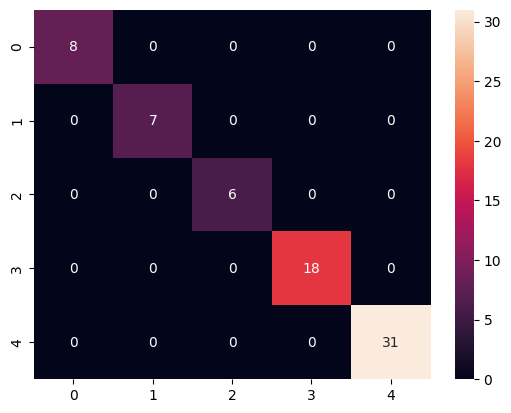

In [46]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

Cross-validation

In [47]:
predict = cross_val_predict(estimator = tree_model,X=X, y=y,cv=5)
print("Classification report: \n", classification_report(y,predict))

Classification report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200

